# Analytical Dataset Exploration

## Date Created: 1/20/22
## Date Modified: 2/21/22 (Millie)

### Authors: Geri, Millie, JJ

This notebook serves as a place to do data exploration on the `initial_analytic_dataset.csv` which holds all the variables of interest from each of our respective datasets. This is a place to look at the relationships between variables and other assumption checks.

At the end of this notebook we are create a final analytic dataset for further analysis, visualizations and modeling. Once confirmed, this notebook will be convered into a script. 

In [1]:
#Packages import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Dataset Introduction

This `initial_analytic_dataset.csv` holds all the columns of interest from the first round of data cleaning. The data includes high level information starting with population data for all county areas, then broadband connection percent, households median income, unemployment rates, and ends with information about devices in each household. These variables were chosen because factors, such as income ane unemployment, may have a relationship or impact whether or not households have access to technology or internet. 

Later in the notebook, other columns will be created with addtional datasets, such as region and division, to visualize factors in subsections of the country. 

In [2]:
file = open("initial_analytic_dataset.csv", "r")
analytic_data = pd.read_csv("initial_analytic_dataset.csv")

In [3]:
for col in analytic_data.columns:
    print(col)

id
pop_total
county
state
pop_class
year
broadband_pct
total_pop_enrolled
percent_total_pop_enrolled
margin_total_pop
est_total_households_frm_income
est_med_income_households
est_total_families
est_med_income_families
est_total_pop_16_over
est_emp_pop_ratio_16_over
est_unemp_pop_ratio_16_over
est_total_households_frm_devices
est_total_households_with_device
est_total_households_with_desktop
est_total_households_with_no
est_total_households_with_smartphone
est_total_households_with_no2
est_total_households_with_portable
est_total_households_with_no3
est_total_households_with_other
est_total_households_with_no4
est_total_households_none
est_total_households_with_sub
est_total_households_with_du
est_total_households_with_broadband
est_total_households_with_cellular
est_total_households_with_cell_no
est_total_households_with_cable
est_total_households_with_sat
est_total_households_without_sub
pct_total_households_with_device
pct_total_households_with_desktop
pct_total_households_with_no
p

Note from Millie: @JJ - Can you provide documentation onw hat the different "est_total_households_with_no" are? I am assuming that it mean no for a specific device, perhaps the one above, but I would like that confirmed.

In [4]:
# Reformating broadband_pct
analytic_data["broadband_pct"] = analytic_data["broadband_pct"] *100
analytic_data["broadband_pct"]

0       78.899997
1       78.099996
2       60.399997
3       66.100001
4       68.500000
          ...    
3217          NaN
3218          NaN
3219          NaN
3220          NaN
3221    79.100001
Name: broadband_pct, Length: 3222, dtype: float64

---

## EDA Exploration

Under this section, we are graphing the relationship between variables overall. Later on region is added to the dataset to look at the relationsips in smaller subsections to gather more insights. 

#### Broadband Percent v. Percent Total Population Enrolled

Text(0.5, 0, 'Broadband Percentage')

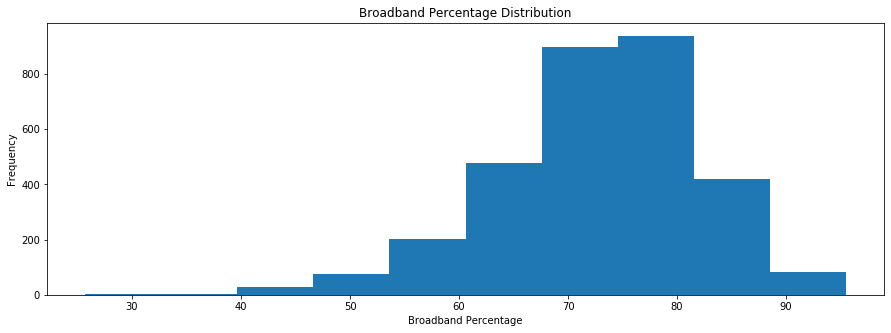

In [5]:
analytic_data["broadband_pct"].plot.hist(figsize=(15, 5))
plt.title("Broadband Percentage Distribution")
plt.xlabel("Broadband Percentage")

Text(0.5, 0, 'Total Pop Enrolled')

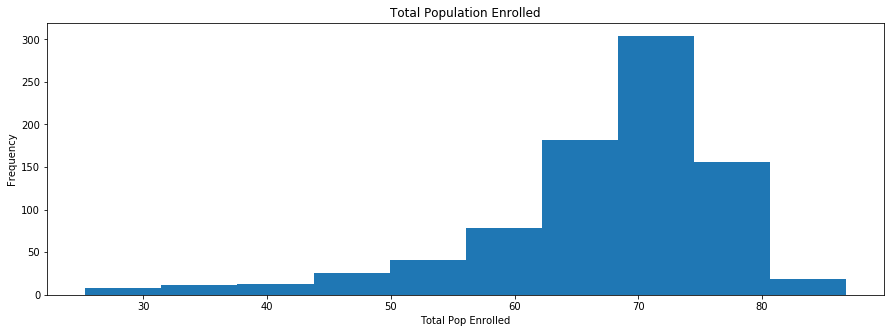

In [6]:
analytic_data["percent_total_pop_enrolled"].plot.hist(figsize=(15, 5))
plt.title("Total Population Enrolled")
plt.xlabel("Total Pop Enrolled")

Text(0, 0.5, 'Total Population Enrolled')

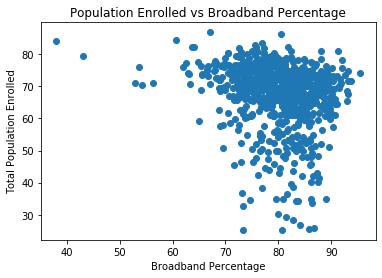

In [7]:
plt.scatter(x = analytic_data["broadband_pct"], y = analytic_data["percent_total_pop_enrolled"]) # The plot
plt.title("Population Enrolled vs Broadband Percentage") # Adding a title
plt.xlabel("Broadband Percentage") # Adding axis labels
plt.ylabel("Total Population Enrolled")

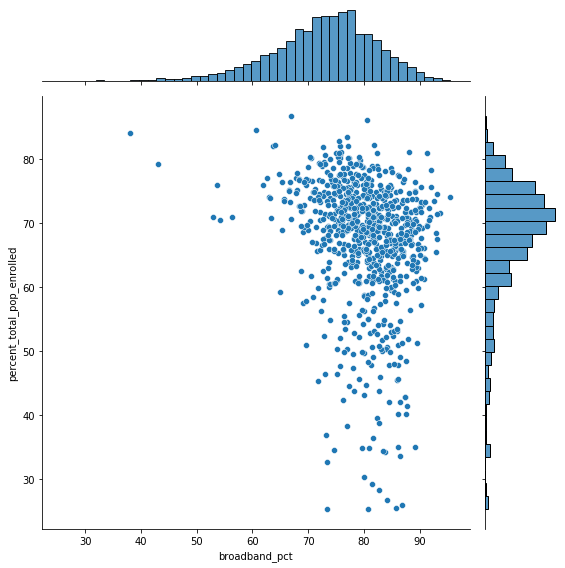

In [8]:
#Note from Millie: I added this plot because I thought it might be more useful than looking at three different plots
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "percent_total_pop_enrolled", height = 8); 

In [9]:
#### Broadband Percent vs Unemployment

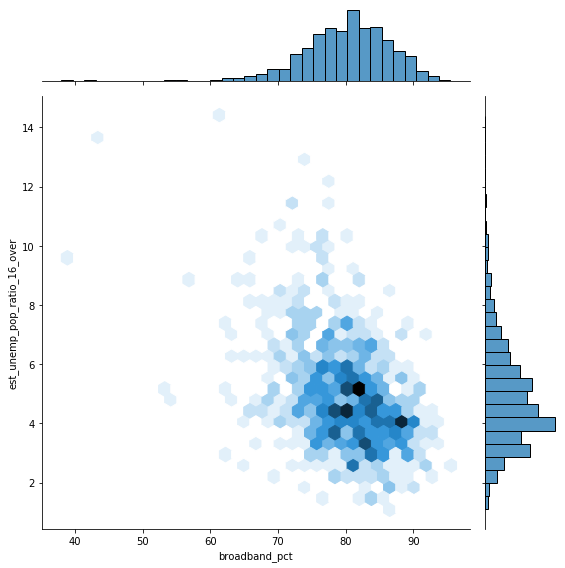

In [10]:
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
              kind = "hex", height = 8); 

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.

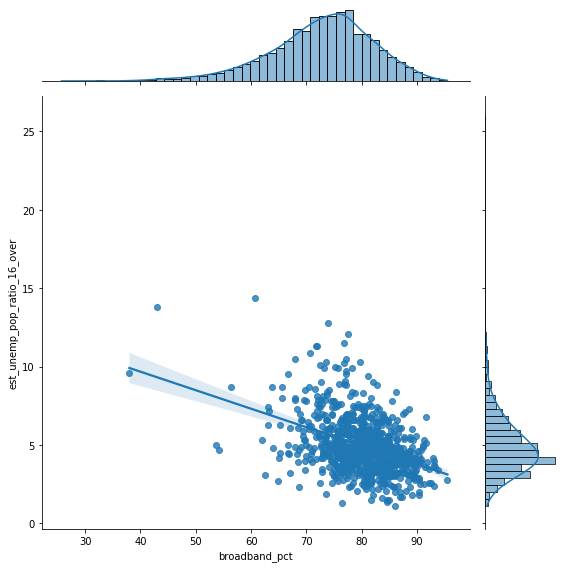

In [11]:
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
              kind = "reg", height = 8); 

### Distrubution of Devices in Households

For now, looking at all households with some sort of device against total households.

In [12]:
#selecting certian variables
devices_in_hh = analytic_data[['id','est_total_households_frm_devices',
'est_total_households_with_device',
'est_total_households_with_desktop',
'est_total_households_with_smartphone',
'est_total_households_with_portable',
'est_total_households_with_other',
'est_total_households_none']]

In [13]:
#choosing columns to pivot
to_pivot = devices_in_hh[[
'est_total_households_with_device',
'est_total_households_with_desktop',
'est_total_households_with_smartphone',
'est_total_households_with_portable']]

#reshaping data
plot_devices_df = pd.melt(devices_in_hh, id_vars = 'id', value_vars = to_pivot, var_name = "type", value_name = "value")

#creating a separate value column to place decimal in different place
plot_devices_df['value2'] = plot_devices_df['value']*.001

In [14]:
plot_devices_df.describe()

,value,value2
count,3.284000e+03,3284.000000
mean,2.689772e+04,26.897725
std,5.226474e+04,52.264741
min,2.178000e+03,2.178000
25%,6.914000e+03,6.914000
50%,1.214100e+04,12.141000
75%,2.669300e+04,26.693000
max,1.348569e+06,1348.569000


There is a huge std and data is heavily skewed to the right. 

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.

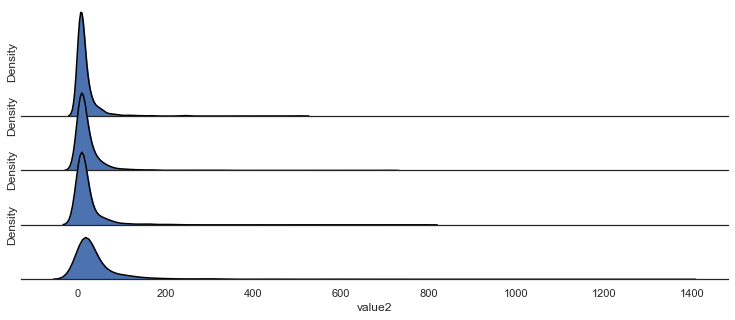

In [15]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_devices_df, row="type", aspect=9, height=1.2, palette = pal)

g.map_dataframe(sns.kdeplot, x="value2", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="value2", color='black')
g.fig.subplots_adjust(hspace=-.5)


g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

#### Employment Data Distribution

In [16]:
employment_info = analytic_data[['id', 'est_total_pop_16_over', 'est_emp_pop_ratio_16_over', 
                                 'est_unemp_pop_ratio_16_over']]

plot_employ_df = pd.melt(employment_info, id_vars = 'id', value_vars = ['est_emp_pop_ratio_16_over', 
                                 'est_unemp_pop_ratio_16_over'], var_name = "type", value_name = "value")

plot_employ_df['value2'] = plot_devices_df['value']*.001

plot_employ_df.describe()


,value,value2
count,1642.000000,1642.000000
mean,31.830390,20.399951
std,27.257013,35.263328
min,1.100000,2.178000
25%,4.600000,5.733000
50%,24.800000,9.967500
75%,59.175000,21.804000
max,76.500000,701.010000


/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.

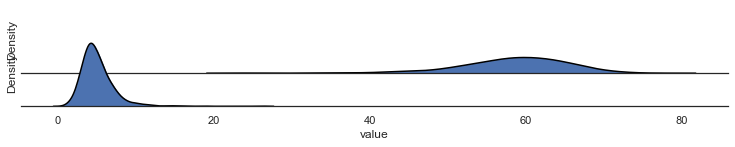

In [17]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_employ_df, row="type", aspect=9, height=1.2, palette = pal)

g.map_dataframe(sns.kdeplot, x="value", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="value", color='black')
g.fig.subplots_adjust(hspace=-.5)


g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

Density plot above is incomplete. Currently troubleshooting. 

References for facet density plot:
- https://seaborn.pydata.org/examples/kde_ridgeplot.html
- https://python.plainenglish.io/ridge-plots-with-pythons-seaborn-4de5725881af

---

## Adding Region Dimension to the Analytic Data

This is to make it easier to breakdown the data visuals so we are not looking at the entire country on one level. All visuals below are exploring with region column. 

In [18]:
regions = pd.read_csv("https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv")
regions.columns = regions.columns.str.lower().str.replace(" ", "_")
regions

,state,state_code,region,division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [19]:
revised_analytic_data = analytic_data.merge(regions, on = "state")

In [20]:
analytic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    3222 non-null   object 
 1   pop_total                             3221 non-null   float64
 2   county                                3221 non-null   object 
 3   state                                 3221 non-null   object 
 4   pop_class                             3221 non-null   object 
 5   year                                  3133 non-null   float64
 6   broadband_pct                         3133 non-null   float64
 7   total_pop_enrolled                    838 non-null    float64
 8   percent_total_pop_enrolled            838 non-null    float64
 9   margin_total_pop                      838 non-null    float64
 10  est_total_households_frm_income       838 non-null    float64
 11  est_med_income_ho

In [21]:
revised_analytic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    3143 non-null   object 
 1   pop_total                             3143 non-null   float64
 2   county                                3143 non-null   object 
 3   state                                 3143 non-null   object 
 4   pop_class                             3143 non-null   object 
 5   year                                  3132 non-null   float64
 6   broadband_pct                         3132 non-null   float64
 7   total_pop_enrolled                    827 non-null    float64
 8   percent_total_pop_enrolled            827 non-null    float64
 9   margin_total_pop                      827 non-null    float64
 10  est_total_households_frm_income       827 non-null    float64
 11  est_med_income_ho

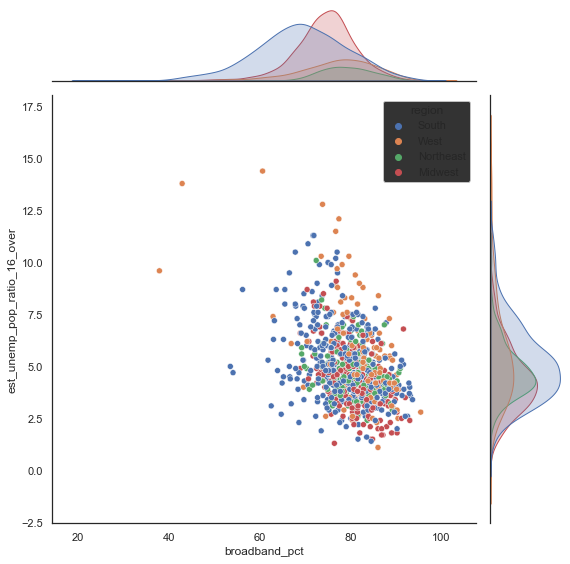

In [22]:
sns.jointplot(data = revised_analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
             hue = "region", height = 8); 

### Broadband Percent by Region

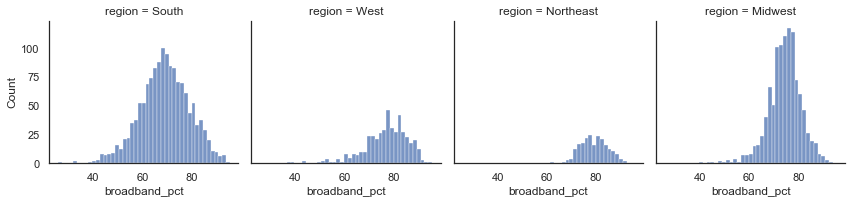

In [23]:
#broadband percent
bb_region = revised_analytic_data[['id', 'region', 'broadband_pct']]
sns.displot(
    bb_region, x="broadband_pct", col="region",
     height=3, facet_kws=dict(margin_titles=True),
);

Viusally speaking, there seems to be a differnce by region when looking at the broadband percentage with the South trailing behind the rest of the regions.

### Unemployment Ratio by Region

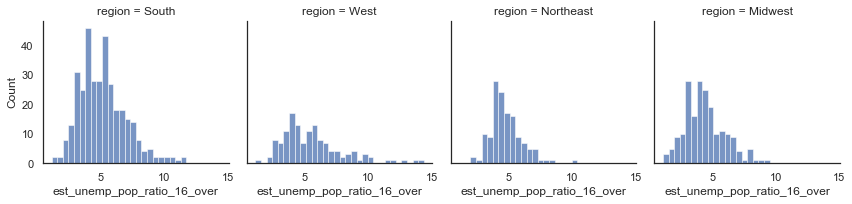

In [24]:
#umemployment ratio
sns.displot(
    revised_analytic_data, x="est_unemp_pop_ratio_16_over", col="region",
    height=3, facet_kws=dict(margin_titles=True)
);

Visually, the unemployment rate seens to around 5% by reion, except for the midwest where it appears to be lower. 

### Median Income by Region

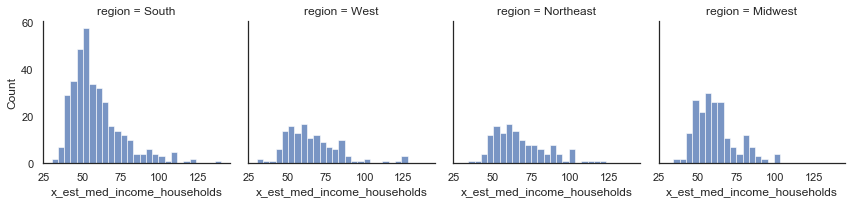

In [25]:
#creating a separate value column to place decimal in different place
revised_analytic_data['x_est_med_income_households'] = revised_analytic_data['est_med_income_households']*.001

#median income
sns.displot(
    revised_analytic_data, x="x_est_med_income_households", col="region",
    height=3, facet_kws=dict(margin_titles=True),
);


### Analyzing Population Classification
Many Rural and Micro Areas do not have Census data for most of our data. Therefore, for smaller, more rural areas, we can only look at broadband data. We may consider breaking down the Metro Areas into different bins.

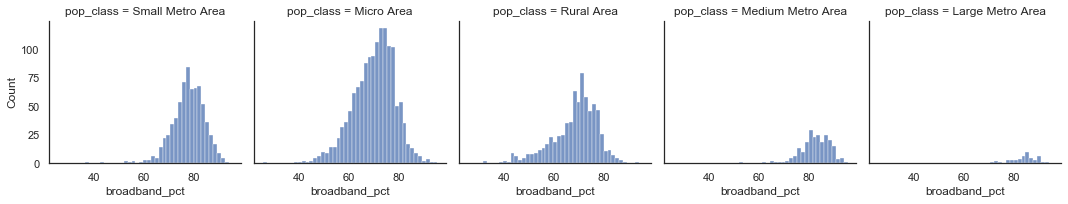

In [26]:
#creating a separate value column to place decimal in different place
revised_analytic_data['broadband_pct'] = revised_analytic_data['broadband_pct']

#median income
sns.displot(
    revised_analytic_data, x="broadband_pct", col="pop_class",
    height=3, facet_kws=dict(margin_titles=True),
);


------

## Creating Scores

#### Notes and Reminders

We are scoring variables to have an easier way to show the levels of need in the counties. At this point in the code. The higher the score the lesser the need (we might have to reverse that). 

### Income

There are various definition of poverty level or income thresholds depending on the size of the household and location. This doucmentation on poverty level for 2018 give thresholds for up to 8 persons in a household: https://aspe.hhs.gov/topics/poverty-economic-mobility/poverty-guidelines/prior-hhs-poverty-guidelines-federal-register-references/2018-poverty-guidelines

There is additional documentation households data here:https://www.census.gov/quickfacts/fact/note/US/HSD410219

With this new information, instead of choosing an arbitruary number of persons in a household and blindly applying it to all, we will need to add infomration from the households and families dataset. 

Note: Millie is creating a new notebook to view and test the data cleaning and then merging it into the initial clean dataset. 

For simplicity, we are working with the median income for households only (we can include families later if we are interested in that feature). We are applying the highest poverty level to all counties. 

In [27]:
#Observing income information 
income_info = analytic_data[['id','est_total_households_official', 'est_avg_household_size',
                             'est_med_income_households',
                             'est_total_families_official','est_avg_families_size',
                             'est_med_income_families']]

income_info["rnd_avg_household_size"] = income_info.loc[:,('est_avg_household_size')].round(0)
income_info["rnd_avg_families_size"] = income_info.loc[:, ('est_avg_families_size')].round(0)
#trying to get rid of the "setting with copy" warning


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Applications/an

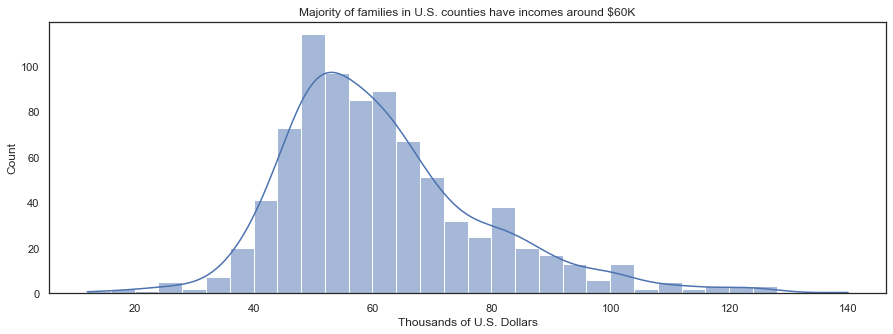

In [28]:
income_info["mod_est_med_income_households"] = income_info["est_med_income_households"]*.001

plt.figure(figsize=(15, 5))
sns.histplot(data=income_info,
             x="mod_est_med_income_households",
             kde=True)
plt.xlabel("Thousands of U.S. Dollars")
plt.title("Majority of families in U.S. counties have incomes around $60K"); 

In [29]:
income_info["rnd_avg_household_size"].unique() #highest avg household is 4

array([nan,  3.,  2.,  4.])

In [30]:
income_info["rnd_avg_families_size"].unique() # highest family household is 5

array([nan,  3.,  4.,  5.,  2.])

In [31]:
#Creating text label for income 
def income_label(est_med_income_households):
    """Assign labels to med county income and household size
    """
    if est_med_income_households < 31380: # highest poverty line is household of 4 in Alaska
        label = "Below Poverty Line"
    elif est_med_income_households >= 31380 and est_med_income_households < 50000: 
        label = "Just Above Poverty"
    elif est_med_income_households >= 50000 and est_med_income_households < 70000: 
        label = "Middle Income"
    elif est_med_income_households >= 70000 and est_med_income_households < 90000: 
        label = "Upper Middle Income"
    elif est_med_income_households >= 90000 and est_med_income_households != 'nan': 
        label = "Upper Income"
    else: #Greater than or equal to 90k
        label = "Unknown"
    return label

#Creating the dict for numeric score of income 
income_score_dict = dict({'Below Poverty Line': 1, 
                         'Just Above Poverty': 2,
                         'Middle Income': 3, 
                         'Upper Middle Income': 4, 
                         'Upper Income': 5})

#applying the labels
revised_analytic_data["income_label"] = revised_analytic_data["est_med_income_households"].apply(income_label)

#applying the score
revised_analytic_data["income_score"] = revised_analytic_data["income_label"].map(income_score_dict)

revised_analytic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 68 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    3143 non-null   object 
 1   pop_total                             3143 non-null   float64
 2   county                                3143 non-null   object 
 3   state                                 3143 non-null   object 
 4   pop_class                             3143 non-null   object 
 5   year                                  3132 non-null   float64
 6   broadband_pct                         3132 non-null   float64
 7   total_pop_enrolled                    827 non-null    float64
 8   percent_total_pop_enrolled            827 non-null    float64
 9   margin_total_pop                      827 non-null    float64
 10  est_total_households_frm_income       827 non-null    float64
 11  est_med_income_ho

As you may notice the income score has fewer non-null values than income_label and that is because a score was not applied if the label == "Unknown"

In [32]:
check1 = revised_analytic_data[["id", "income_label", "income_score"]]

check1 = check1.groupby(["income_label", "income_score"]).count()

check1

,,id
income_label,income_score,
Below Poverty Line,1.0,1
Just Above Poverty,2.0,192
Middle Income,3.0,430
Upper Income,5.0,56
Upper Middle Income,4.0,148


## Device Score (by each device)

> NOTE: Currently none of the device scores are incorporated into the final dataset

> @ JJ - The syntax you have here does not match the data columns you selected. It seems like you were working with a different copy and you need to update here. Please see the commented lines to correct. Also, please add additional comments and notes so everyone understands what is happening here. 

device_pct_by_pop = revised_analytic_data.iloc[:,[0,1,2,19,20,21,22,23,24,25,26,27,28,29,30]].copy() 
device_pct_by_pop

device_pct_by_pop.info() # I added the number 19 to the list above so I could run the other cells.

#device_pct_by_pop["survery_pct"] = device_pct_by_pop["est_total_households_y"]/device_pct_by_pop["pop_total"]*100
#device_pct_by_pop["total_device_pct"] = device_pct_by_pop["est_total_households_with_device"]/device_pct_by_pop["pop_total"]*100
device_pct_by_pop["total_desktop_pct"] = device_pct_by_pop["est_total_households_with_desktop"]/device_pct_by_pop["pop_total"]*100
device_pct_by_pop["total_smartphone_pct"] = device_pct_by_pop["est_total_households_with_smartphone"]/device_pct_by_pop["pop_total"]*100
device_pct_by_pop["total_portable_pct"] = device_pct_by_pop["est_total_households_with_portable"]/device_pct_by_pop["pop_total"]*100
device_pct_by_pop["total_no_device_pct"] = device_pct_by_pop["est_total_households_none"]/device_pct_by_pop["pop_total"]*100
device_pct_by_pop


### Desktop Percent Score

> !!! @ JJ - Why are we only working with 21 rows of data?


> Nan values are being considered as 0 let me know if this is what we want to do and I can adjust.

In [33]:
def pct_desktop_rank(pct_total_households_with_desktop):
    """Assign labels to county according to their broadband pct
    """
    if pct_total_households_with_desktop >= 50.963 and pct_total_households_with_desktop < 59.495: ##Less than 2 standard deviations below
        label = "1"
    elif pct_total_households_with_desktop < 68.027: ##Less than 1 standard deviations below
        label = "2"
    elif pct_total_households_with_desktop < 85.091: ##Less than 1 standard deviations above
        label = "3"
    elif pct_total_households_with_desktop < 93.623: ##Less than 2 standard deviations above
        label = "4"
    elif pct_total_households_with_desktop > 93.623 and pct_total_households_with_desktop < 105.155: ##Greater than 2 standard deviations above
        label = "5"    
    else: 
        label = "0"
    return label
revised_analytic_data["desktop_rank"] = revised_analytic_data["pct_total_households_with_desktop"].apply(pct_desktop_rank)
revised_analytic_data


,id,pop_total,county,state,pop_class,year,broadband_pct,total_pop_enrolled,percent_total_pop_enrolled,margin_total_pop,...,est_avg_household_size,est_total_families_official,est_avg_families_size,state_code,region,division,x_est_med_income_households,income_label,income_score,desktop_rank
0,0500000US01001,58805.0,Autauga County,Alabama,Small Metro Area,2018.0,78.899997,NaN,NaN,NaN,...,NaN,NaN,NaN,AL,South,East South Central,NaN,Unknown,NaN,0
1,0500000US01003,231767.0,Baldwin County,Alabama,Small Metro Area,2018.0,78.099996,35912.0,79.0,1447.0,...,2.57,55354.0,3.18,AL,South,East South Central,56.813,Middle Income,3.0,3
2,0500000US01005,25223.0,Barbour County,Alabama,Micro Area,2018.0,60.399997,NaN,NaN,NaN,...,NaN,NaN,NaN,AL,South,East South Central,NaN,Unknown,NaN,0
3,0500000US01007,22293.0,Bibb County,Alabama,Micro Area,2018.0,66.100001,NaN,NaN,NaN,...,NaN,NaN,NaN,AL,South,East South Central,NaN,Unknown,NaN,0
4,0500000US01009,59134.0,Blount County,Alabama,Small Metro Area,2018.0,68.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,AL,South,East South Central,NaN,Unknown,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0500000US56037,42272.0,Sweetwater County,Wyoming,Micro Area,2018.0,82.400006,NaN,NaN,NaN,...,NaN,NaN,NaN,WY,West,Mountain,NaN,Unknown,NaN,0
3139,0500000US56039,23331.0,Teton County,Wyoming,Micro Area,2018.0,85.899997,NaN,NaN,NaN,...,NaN,NaN,NaN,WY,West,Mountain,NaN,Unknown,NaN,0
3140,0500000US56041,20450.0,Uinta County,Wyoming,Micro Area,2018.0,88.200003,NaN,NaN,NaN,...,NaN,NaN,NaN,WY,West,Mountain,NaN,Unknown,NaN,0
3141,0500000US56043,7685.0,Washakie County,Wyoming,Rural Area,2018.0,78.299993,NaN,NaN,NaN,...,NaN,NaN,NaN,WY,West,Mountain,NaN,Unknown,NaN,0


In [34]:
revised_analytic_data["desktop_rank"].value_counts()

0    2316
3     590
4     130
2      97
1       8
5       2
Name: desktop_rank, dtype: int64

In [35]:
def pct_smartphone_rank(pct_total_households_with_smartphone):
    """Assign labels to county according to their broadband pct
    """
    if pct_total_households_with_smartphone >= 66.27 and pct_total_households_with_smartphone < 71.983 : ##Less than 2 standard deviations below
        label = "1"
    elif pct_total_households_with_smartphone < 77.696: ##Less than 1 standard deviations below
        label = "2"
    elif pct_total_households_with_smartphone < 89.122: ##Less than 1 standard deviations above
        label = "3"
    elif pct_total_households_with_smartphone < 94.835: ##Less than 2 standard deviations above
        label = "4"
    elif pct_total_households_with_smartphone > 94.835 and pct_total_households_with_smartphone < 100.548: ##Greater than 2 standard deviations above
        label = "5"    
    else: 
        label = "0"
    return label
revised_analytic_data["smartphone_rank"] = revised_analytic_data["pct_total_households_with_smartphone"].apply(pct_smartphone_rank)
revised_analytic_data


,id,pop_total,county,state,pop_class,year,broadband_pct,total_pop_enrolled,percent_total_pop_enrolled,margin_total_pop,...,est_total_families_official,est_avg_families_size,state_code,region,division,x_est_med_income_households,income_label,income_score,desktop_rank,smartphone_rank
0,0500000US01001,58805.0,Autauga County,Alabama,Small Metro Area,2018.0,78.899997,NaN,NaN,NaN,...,NaN,NaN,AL,South,East South Central,NaN,Unknown,NaN,0,0
1,0500000US01003,231767.0,Baldwin County,Alabama,Small Metro Area,2018.0,78.099996,35912.0,79.0,1447.0,...,55354.0,3.18,AL,South,East South Central,56.813,Middle Income,3.0,3,3
2,0500000US01005,25223.0,Barbour County,Alabama,Micro Area,2018.0,60.399997,NaN,NaN,NaN,...,NaN,NaN,AL,South,East South Central,NaN,Unknown,NaN,0,0
3,0500000US01007,22293.0,Bibb County,Alabama,Micro Area,2018.0,66.100001,NaN,NaN,NaN,...,NaN,NaN,AL,South,East South Central,NaN,Unknown,NaN,0,0
4,0500000US01009,59134.0,Blount County,Alabama,Small Metro Area,2018.0,68.500000,NaN,NaN,NaN,...,NaN,NaN,AL,South,East South Central,NaN,Unknown,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0500000US56037,42272.0,Sweetwater County,Wyoming,Micro Area,2018.0,82.400006,NaN,NaN,NaN,...,NaN,NaN,WY,West,Mountain,NaN,Unknown,NaN,0,0
3139,0500000US56039,23331.0,Teton County,Wyoming,Micro Area,2018.0,85.899997,NaN,NaN,NaN,...,NaN,NaN,WY,West,Mountain,NaN,Unknown,NaN,0,0
3140,0500000US56041,20450.0,Uinta County,Wyoming,Micro Area,2018.0,88.200003,NaN,NaN,NaN,...,NaN,NaN,WY,West,Mountain,NaN,Unknown,NaN,0,0
3141,0500000US56043,7685.0,Washakie County,Wyoming,Rural Area,2018.0,78.299993,NaN,NaN,NaN,...,NaN,NaN,WY,West,Mountain,NaN,Unknown,NaN,0,0


In [36]:
revised_analytic_data["smartphone_rank"].value_counts()

0    2316
3     599
4     119
2      87
1      19
5       3
Name: smartphone_rank, dtype: int64

In [37]:
def pct_portable_rank(pct_total_households_with_portable):
    """Assign labels to county according to their broadband pct
    """
    if pct_total_households_with_portable >= 36.78 and pct_total_households_with_portable < 45.083: ##Less than 2 standard deviations below
        label = "1"
    elif pct_total_households_with_portable <  53.386: ##Less than 1 standard deviations below
        label = "2"
    elif pct_total_households_with_portable < 69.992: ##Less than 1 standard deviations above
        label = "3"
    elif pct_total_households_with_portable < 78.295: ##Less than 2 standard deviations above
        label = "4"
    elif pct_total_households_with_portable > 78.295 and pct_total_households_with_portable < 86.598: ##Greater than 2 standard deviations above
        label = "5"    
    else: 
        label = "0"
    return label
revised_analytic_data["portable_rank"] = revised_analytic_data["pct_total_households_with_portable"].apply(pct_portable_rank)
revised_analytic_data


,id,pop_total,county,state,pop_class,year,broadband_pct,total_pop_enrolled,percent_total_pop_enrolled,margin_total_pop,...,est_avg_families_size,state_code,region,division,x_est_med_income_households,income_label,income_score,desktop_rank,smartphone_rank,portable_rank
0,0500000US01001,58805.0,Autauga County,Alabama,Small Metro Area,2018.0,78.899997,NaN,NaN,NaN,...,NaN,AL,South,East South Central,NaN,Unknown,NaN,0,0,0
1,0500000US01003,231767.0,Baldwin County,Alabama,Small Metro Area,2018.0,78.099996,35912.0,79.0,1447.0,...,3.18,AL,South,East South Central,56.813,Middle Income,3.0,3,3,3
2,0500000US01005,25223.0,Barbour County,Alabama,Micro Area,2018.0,60.399997,NaN,NaN,NaN,...,NaN,AL,South,East South Central,NaN,Unknown,NaN,0,0,0
3,0500000US01007,22293.0,Bibb County,Alabama,Micro Area,2018.0,66.100001,NaN,NaN,NaN,...,NaN,AL,South,East South Central,NaN,Unknown,NaN,0,0,0
4,0500000US01009,59134.0,Blount County,Alabama,Small Metro Area,2018.0,68.500000,NaN,NaN,NaN,...,NaN,AL,South,East South Central,NaN,Unknown,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0500000US56037,42272.0,Sweetwater County,Wyoming,Micro Area,2018.0,82.400006,NaN,NaN,NaN,...,NaN,WY,West,Mountain,NaN,Unknown,NaN,0,0,0
3139,0500000US56039,23331.0,Teton County,Wyoming,Micro Area,2018.0,85.899997,NaN,NaN,NaN,...,NaN,WY,West,Mountain,NaN,Unknown,NaN,0,0,0
3140,0500000US56041,20450.0,Uinta County,Wyoming,Micro Area,2018.0,88.200003,NaN,NaN,NaN,...,NaN,WY,West,Mountain,NaN,Unknown,NaN,0,0,0
3141,0500000US56043,7685.0,Washakie County,Wyoming,Rural Area,2018.0,78.299993,NaN,NaN,NaN,...,NaN,WY,West,Mountain,NaN,Unknown,NaN,0,0,0


In [38]:
revised_analytic_data["portable_rank"].value_counts()

0    2316
3     616
4     104
2      77
5      17
1      13
Name: portable_rank, dtype: int64

In [39]:
def pct_no_device_rank(pct_total_households_no_device):
    """Assign labels to county according to their broadband pct
    """
    if pct_total_households_no_device  >= -(4.192) and pct_total_households_no_device < 0.096: ##Less than 2 standard deviations below
        label = "1"
    elif pct_total_households_no_device < 4.384: ##Less than 1 standard deviations below
        label = "2"
    elif pct_total_households_no_device < 12.96: ##Less than 1 standard deviations above
        label = "3"
    elif pct_total_households_no_device < 17.248: ##Less than 2 standard deviations above
        label = "4"
    elif pct_total_households_no_device > 17.248 and pct_total_households_no_device < 21.536: ##Greater than 2 standard deviations above
        label = "5"    
    else: 
        label = "0"
    return label
revised_analytic_data["no_device_rank"] = revised_analytic_data["pct_total_households_no_device"].apply(pct_no_device_rank)
revised_analytic_data


,id,pop_total,county,state,pop_class,year,broadband_pct,total_pop_enrolled,percent_total_pop_enrolled,margin_total_pop,...,state_code,region,division,x_est_med_income_households,income_label,income_score,desktop_rank,smartphone_rank,portable_rank,no_device_rank
0,0500000US01001,58805.0,Autauga County,Alabama,Small Metro Area,2018.0,78.899997,NaN,NaN,NaN,...,AL,South,East South Central,NaN,Unknown,NaN,0,0,0,0
1,0500000US01003,231767.0,Baldwin County,Alabama,Small Metro Area,2018.0,78.099996,35912.0,79.0,1447.0,...,AL,South,East South Central,56.813,Middle Income,3.0,3,3,3,3
2,0500000US01005,25223.0,Barbour County,Alabama,Micro Area,2018.0,60.399997,NaN,NaN,NaN,...,AL,South,East South Central,NaN,Unknown,NaN,0,0,0,0
3,0500000US01007,22293.0,Bibb County,Alabama,Micro Area,2018.0,66.100001,NaN,NaN,NaN,...,AL,South,East South Central,NaN,Unknown,NaN,0,0,0,0
4,0500000US01009,59134.0,Blount County,Alabama,Small Metro Area,2018.0,68.500000,NaN,NaN,NaN,...,AL,South,East South Central,NaN,Unknown,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0500000US56037,42272.0,Sweetwater County,Wyoming,Micro Area,2018.0,82.400006,NaN,NaN,NaN,...,WY,West,Mountain,NaN,Unknown,NaN,0,0,0,0
3139,0500000US56039,23331.0,Teton County,Wyoming,Micro Area,2018.0,85.899997,NaN,NaN,NaN,...,WY,West,Mountain,NaN,Unknown,NaN,0,0,0,0
3140,0500000US56041,20450.0,Uinta County,Wyoming,Micro Area,2018.0,88.200003,NaN,NaN,NaN,...,WY,West,Mountain,NaN,Unknown,NaN,0,0,0,0
3141,0500000US56043,7685.0,Washakie County,Wyoming,Rural Area,2018.0,78.299993,NaN,NaN,NaN,...,WY,West,Mountain,NaN,Unknown,NaN,0,0,0,0


In [40]:
revised_analytic_data["no_device_rank"].value_counts()

0    2321
3     651
2      92
4      66
5      13
Name: no_device_rank, dtype: int64

device_pct_by_pop.describe()

device_pct_by_pop.info()

#NOTE: This logic does not work because you are overwriting your logic from above. 
# See the income scoring code above as an example of properly applying a range and not overwriting items below
# Also see the "review1" cells below to see what your output looks like based on what you have now.

def desktop_pct_rank(total_desktop_pct):
    """Assign labels to county according to their broadband pct
    """
    if total_desktop_pct < 1.579: ##Less than 2 standard deviations below
        label = "1"
    elif total_desktop_pct < 4.233: ##Less than 1 standard deviations below
        label = "2"
    elif total_desktop_pct < 9.511: ##Less than 1 standard deviations above
        label = "3"
    elif total_desktop_pct < 12.155: ##Less than 2 standard deviations above
        label = "4"
    elif total_desktop_pct > 14.799: ##Greater than 2 standard deviations above
        label = "5"    
    else: 
        label = "0"
    return label
device_pct_by_pop["desktop_rank"] = device_pct_by_pop["total_desktop_pct"].apply(desktop_pct_rank)
device_pct_by_pop

> !! @ JJ - Reviewing your code below. All 21 rows received a 3. Please check your function so this is corrected. 

#Selecting only columns of interest
review1 = device_pct_by_pop[["id", "desktop_rank"]]

#grouping by newly created "desktop_rank" and counting 
review1 = review1.groupby("desktop_rank").count()

review1

### Smartphone Percent Score

def smartphone_pct_rank(total_smartphone_pct):
    """Assign labels to county according to their broadband pct
    """
    if total_smartphone_pct < 4.275: ##Less than 2 standard deviations below
        label = "1"
    elif total_smartphone_pct < 5.207: ##Less than 1 standard deviations below
        label = "2"
    elif total_smartphone_pct < 7.271: ##Less than 1 standard deviations above
        label = "3"
    elif total_smartphone_pct < 8.303: ##Less than 2 standard deviations above
        label = "4"
    elif total_smartphone_pct > 9.335: ##Greater than 2 standard deviations above
        label = "5"    
    else: 
        label = "0"
    return label
device_pct_by_pop["smartphone_rank"] = device_pct_by_pop["total_smartphone_pct"].apply(smartphone_pct_rank)

> !! @ JJ - Same issues as above echo here.

#Selecting only columns of interest
review2 = device_pct_by_pop[["id", "smartphone_rank"]]

#grouping by newly created "smartphone_rank" and counting 
review2 = review2.groupby("smartphone_rank").count()

review2

def portable_pct_rank(total_portable_pct):
    """Assign labels to county according to their broadband pct
    """
    if total_portable_pct < 9.709: ##Less than 2 standard deviations below
        label = "1"
    elif total_portable_pct < 11.057: ##Less than 1 standard deviations below
        label = "2"
    elif total_portable_pct < 13.753: ##Less than 1 standard deviations above
        label = "3"
    elif total_portable_pct < 15.101: ##Less than 2 standard deviations above
        label = "4"
    elif total_portable_pct > 16.449: ##Greater than 2 standard deviations above
        label = "5"    
    else: 
        label = "0"
    return label
device_pct_by_pop["portable_rank"] = device_pct_by_pop["total_portable_pct"].apply(portable_pct_rank)

> !! @ JJ - Same issues as above echo here.

#Selecting only columns of interest
review3 = device_pct_by_pop[["id", "portable_rank"]]

#grouping by newly created "portable_rank" and counting 
review3 = review3.groupby("portable_rank").count()

review3

def no_device_pct_rank(total_no_device_pct):
    """Assign labels to county according to their broadband pct
    """
    if total_no_device_pct < 2.689: ##Less than 2 standard deviations below
        label = "1"
    elif total_no_device_pct < 4.763: ##Less than 1 standard deviations below
        label = "2"
    elif total_no_device_pct < 8.911: ##Less than 1 standard deviations above
        label = "3"
    elif total_no_device_pct < 10.985: ##Less than 2 standard deviations above
        label = "4"
    elif total_no_device_pct > 13.059: ##Greater than 2 standard deviations above
        label = "5"    
    else: 
        label = "0"
    return label
device_pct_by_pop["no_device_rank"] = device_pct_by_pop["total_no_device_pct"].apply(no_device_pct_rank)

> !! @ JJ - Same issues as above echo here.

#Selecting only columns of interest
review4 = device_pct_by_pop[["id", "no_device_rank"]]

#grouping by newly created "portable_rank" and counting 
review4 = review4.groupby("no_device_rank").count()

review4

## Broadband Score

Broadband Percentage Score was assigned by the data percentiles found in the dataset. Scores were assigned with 1 being the lowest percentile and 

In [41]:
revised_analytic_data["broadband_pct"].describe()

count    3132.000000
mean       72.689687
std         9.252030
min        25.700000
25%        67.400002
50%        73.600000
75%        78.800005
max        95.499998
Name: broadband_pct, dtype: float64

In [42]:
#creating broadband classification
def bdbd_type(broadband_pct):
    """Assign labels to county according to their broadband pct
    """
    if broadband_pct < 25.7:
        label = "1"
    elif broadband_pct < 67.4: #Between 25.8 to 67.4
        label = "2"
    elif broadband_pct < 73.6: #Between 67.5 to 73.6
        label = "3"
    elif broadband_pct < 78.8: #Between 73.7 to 78.8
        label = "4"
    elif broadband_pct > 78.8: #Greater than 78.8
        label = "5"    
    else: #Greater than 50k
        label = "1"
    return label

In [43]:
revised_analytic_data["bdbd_score"] = revised_analytic_data["broadband_pct"].apply(bdbd_type)

#### !! @ Geri - 

As it stands right now based on your comments on what you intend to do, there is not a distinct difference between labels 2 - 4. There is also a huge jump between 1 and 2. These are not equal (enough) pieces or steps. Perhaps on the way your data is distributed, you might beed to break this down into only 3 instead of 5 because of how skewed the data is. For example, if most of the counties have 75% broadband, it is okay if most of the data gets the same score becuase that is how the data is. Think of trying explain the scores to another person who is reading this -- if a 2 is not that different from 4 it becomes a little misleading. 

In [44]:
#Selecting only columns of interest
review5 = revised_analytic_data[["id", "bdbd_score"]]

#grouping by newly created "portable_rank" and counting 
review5 = review5.groupby("bdbd_score").count()

review5

,id
bdbd_score,
1,11
2,779
3,779
4,785
5,789


In [45]:
bdbd_df = revised_analytic_data[["county", "state","pop_total", "pop_class", "broadband_pct", "bdbd_score"]]
bdbd_df

,county,state,pop_total,pop_class,broadband_pct,bdbd_score
0,Autauga County,Alabama,58805.0,Small Metro Area,78.899997,5
1,Baldwin County,Alabama,231767.0,Small Metro Area,78.099996,4
2,Barbour County,Alabama,25223.0,Micro Area,60.399997,2
3,Bibb County,Alabama,22293.0,Micro Area,66.100001,2
4,Blount County,Alabama,59134.0,Small Metro Area,68.500000,3
...,...,...,...,...,...,...
3138,Sweetwater County,Wyoming,42272.0,Micro Area,82.400006,5
3139,Teton County,Wyoming,23331.0,Micro Area,85.899997,5
3140,Uinta County,Wyoming,20450.0,Micro Area,88.200003,5
3141,Washakie County,Wyoming,7685.0,Rural Area,78.299993,4


In [46]:
corrz = bdbd_df.corr()
corrz

,pop_total,broadband_pct
pop_total,1.000000,0.268957
broadband_pct,0.268957,1.000000


In [47]:
my_contingency_table = pd.crosstab(index=bdbd_df["pop_class"], columns=bdbd_df["bdbd_score"])
my_contingency_table

bdbd_score,1,2,3,4,5
pop_class,,,,,
Large Metro Area,0,0,2,6,41
Medium Metro Area,0,5,8,35,180
Micro Area,0,483,402,357,177
Rural Area,10,253,251,161,58
Small Metro Area,1,38,116,226,333


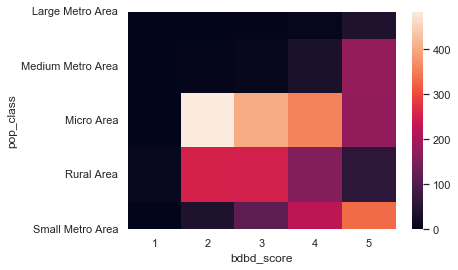

In [48]:
sns.heatmap(my_contingency_table)

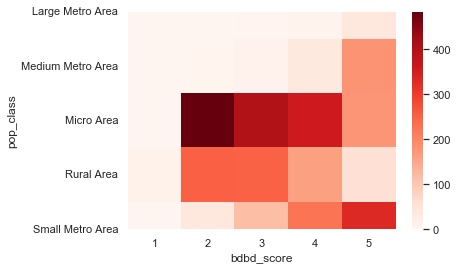

In [49]:
sns.heatmap(my_contingency_table, cmap="Reds")

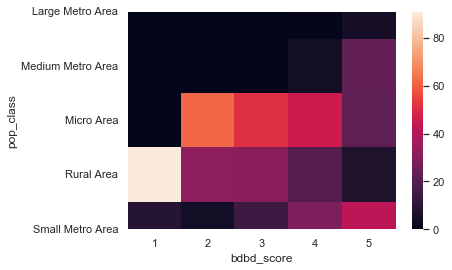

In [50]:
norm_con = pd.crosstab(index=bdbd_df["pop_class"], columns=bdbd_df["bdbd_score"], normalize="columns")*100
sns.heatmap(norm_con)

In [51]:
revised_analytic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 73 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    3143 non-null   object 
 1   pop_total                             3143 non-null   float64
 2   county                                3143 non-null   object 
 3   state                                 3143 non-null   object 
 4   pop_class                             3143 non-null   object 
 5   year                                  3132 non-null   float64
 6   broadband_pct                         3132 non-null   float64
 7   total_pop_enrolled                    827 non-null    float64
 8   percent_total_pop_enrolled            827 non-null    float64
 9   margin_total_pop                      827 non-null    float64
 10  est_total_households_frm_income       827 non-null    float64
 11  est_med_income_ho

> NOTE: When the times comes with correct devices data scoring is incorporated, this can be regenerated and named as final.

In [52]:
#Exporting csv file
revised_analytic_data.to_csv(r'revised_analytic_dataset.csv', index = False)